In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-data-from-2020-to-present/Crime_Data_from_2020_to_Present.csv
/kaggle/input/crime-data-from-2020-to-present/Crime_Data_from_2010_to_2019.csv


# Reading the data

In [2]:
# Reading LA crimes data from 2010 up to 2019
past_data = pd.read_csv('/kaggle/input/crime-data-from-2020-to-present/Crime_Data_from_2010_to_2019.csv')

In [3]:
past_data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [4]:
indexed_area = {'NaN': 10, 'Newton': 8, 'Pacific': 6, 'Hollywood': 2, 'Central': 1, 'Northeast': 14, 'Hollenbeck': 9, 'Southwest': 12, 'Rampart': 7, 'Devonshire': 19, 'Southeast': 13, 'Olympic': 15, 'Harbor': 10, 'Wilshire': 5, '77th Street': 11, 'West LA': 3, 'Topanga': 18, 'Mission': 21, 'Van Nuys': 17, 'N Hollywood': 16, 'Foothill': 20, 'West Valley': 4}
distance_from_center = past_data['AREA NAME'].map(lambda x: indexed_area[x])

In [5]:
past_data['Distance Index'] = distance_from_center
past_data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Distance Index
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,8
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,6
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,8
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,2
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119792,190506304,02/22/2019 12:00:00 AM,02/22/2019 12:00:00 AM,840,5,Harbor,569,2,627,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,...,Adult Other,627.0,NaN,NaN,NaN,100 W 22ND ST,NaN,33.7257,-118.2801,10
2119793,190608903,03/28/2019 12:00:00 AM,03/28/2019 12:00:00 AM,400,6,Hollywood,644,1,648,ARSON,...,Invest Cont,648.0,NaN,NaN,NaN,1400 N LA BREA AV,NaN,34.0962,-118.3490,2
2119794,192004409,01/06/2019 12:00:00 AM,01/06/2019 12:00:00 AM,2100,20,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,Invest Cont,930.0,NaN,NaN,NaN,6TH,VIRGIL,34.0637,-118.2870,15
2119795,191716777,10/17/2019 12:00:00 AM,10/16/2019 12:00:00 AM,1800,17,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,Invest Cont,420.0,NaN,NaN,NaN,17200 NAPA ST,NaN,34.2266,-118.5085,19


In [6]:
past_data["AREA NAME"].unique()

array(['Newton', 'Pacific', 'Hollywood', 'Central', 'Northeast',
       'Hollenbeck', 'Southwest', 'Rampart', 'Devonshire', 'Southeast',
       'Olympic', 'Harbor', 'Wilshire', '77th Street', 'West LA',
       'Topanga', 'Mission', 'Van Nuys', 'N Hollywood', 'Foothill',
       'West Valley'], dtype=object)

In [7]:
past_data = past_data[((past_data["Vict Sex"] == "M") | (past_data["Vict Sex"] == "F"))]

# Dropping useless columns

In [8]:
print(past_data.columns)
definitely_useless_columns = [
    'DR_NO',
    'AREA NAME',
    'Rpt Dist No',
    'Date Rptd',
    'Part 1-2',
    'Mocodes',
    'Vict Descent',
    'Premis Cd',
    'Premis Desc',
    'Weapon Used Cd',
    'Weapon Desc',
    'Status',
    'Status Desc',
    'Crm Cd 1',
    'Crm Cd 2',
    'Crm Cd 3',
    'Crm Cd 4',
    'LOCATION',
    'Cross Street',
]
#and this columns can be used in future models, but useless for now
questioned_columns = [
    'TIME OCC',
    'Crm Cd Desc'
]
past_data.drop(definitely_useless_columns + questioned_columns, axis=1, inplace=True)

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'Distance Index'],
      dtype='object')


/tmp/ipykernel_24/3938631374.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  past_data.drop(definitely_useless_columns + questioned_columns, axis=1, inplace=True)


# Check for nans

In [9]:
#there are no nans in the data, but there are rows with zeroes in longitude or latitude (not corresponding to LA), let's drop them.
past_data = past_data[((past_data['LON'] > 0.1) | (past_data['LON'] < -0.1)) & ((past_data['LAT'] < -0.1) | (past_data['LAT'] > 0.1))]
past_data = past_data[((past_data["Vict Sex"] == "M") | (past_data["Vict Sex"] == "F"))]
display(past_data.isna().sum())
past_data.reset_index(inplace=True, drop=True)

DATE OCC          0
AREA              0
Crm Cd            0
Vict Age          0
Vict Sex          0
LAT               0
LON               0
Distance Index    0
dtype: int64

# Scaling the time

In [10]:
#get day as a feature
from datetime import datetime
scaled_dates = past_data['DATE OCC'].apply(lambda x: datetime.strptime(x[:10], '%m/%d/%Y'))
scaled_dates = (scaled_dates - scaled_dates.min()).apply(lambda x: x.days).astype(float)
scaled_dates = scaled_dates / 100
past_data['DATE OCC'] = scaled_dates

# Scaling the coordinates

In [11]:
#scaling the longitude and latitude
past_data['init_lat'] = past_data['LAT']
past_data['init_lon'] = past_data['LON']
#here we are remembering the linear transformation coefficients 
#so that we can use it for displaying our predictions on the map later
b_lat, a_lat = past_data['LAT'].min(), (past_data['LAT'].max() - past_data['LAT'].min())
b_lon, a_lon = past_data['LON'].min(), (past_data['LON'].max() - past_data['LON'].min())
past_data['LON'] = (past_data['LON'] - past_data['LON'].min()) / (past_data['LON'].max() - past_data['LON'].min())
past_data['LAT'] = (past_data['LAT'] - past_data['LAT'].min()) / (past_data['LAT'].max() - past_data['LAT'].min())

# Drop low-frequency crimes

In [12]:
#drop crimes with low occurency
counts = past_data['Crm Cd'].value_counts()
matching = pd.Series([counts[x] > 1000 for x in past_data['Crm Cd']])
past_data = past_data[matching]

# Use one-hot encoding on Area and Crime Code features

In [13]:
past_data['AREA '] = past_data['AREA '].astype(str)
past_data['Crm Cd'] = past_data['Crm Cd'].astype(str)

In [14]:
data = pd.get_dummies(past_data, dtype=float).sort_values(by='DATE OCC')
data.reset_index(inplace=True, drop=True)
print(data.columns)

Index(['DATE OCC', 'Vict Age', 'LAT', 'LON', 'Distance Index', 'init_lat',
       'init_lon', 'AREA _1', 'AREA _10', 'AREA _11',
       ...
       'Crm Cd_928', 'Crm Cd_930', 'Crm Cd_932', 'Crm Cd_940', 'Crm Cd_943',
       'Crm Cd_946', 'Crm Cd_951', 'Crm Cd_956', 'Vict Sex_F', 'Vict Sex_M'],
      dtype='object', length=103)


In [15]:
# Delete all non-relevant data
data = data[data["DATE OCC"] > 15.0]
# print new data
data

,DATE OCC,Vict Age,LAT,LON,Distance Index,init_lat,init_lon,AREA _1,AREA _10,AREA _11,...,Crm Cd_928,Crm Cd_930,Crm Cd_932,Crm Cd_940,Crm Cd_943,Crm Cd_946,Crm Cd_951,Crm Cd_956,Vict Sex_F,Vict Sex_M
740168,15.01,63,0.429972,0.385517,6,33.9653,-118.3775,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
740169,15.01,81,0.576588,0.345973,17,34.1776,-118.4237,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
740170,15.01,48,0.473550,0.497304,8,34.0284,-118.2469,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
740171,15.01,0,0.621961,0.357785,20,34.2433,-118.4099,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
740172,15.01,23,0.274171,0.458444,10,33.7397,-118.2923,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852660,36.51,59,0.510843,0.567919,9,34.0824,-118.1644,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1852661,36.51,62,0.483494,0.497989,1,34.0428,-118.2461,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1852662,36.51,18,0.488191,0.415475,5,34.0496,-118.3425,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1852663,36.51,56,0.498757,0.401181,5,34.0649,-118.3592,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# For baseline we'll only use coordinates and time

In [16]:
data_crit = past_data.loc[:, ['DATE OCC', 'LAT', 'LON', 'Vict Age', 'Vict Sex', 'Distance Index']]

In [17]:
data_crit = data_crit.replace("M", 1).replace("F", 0)

In [18]:
#won't take all rows so that our dataset will fit into GPU
data_np = data_crit.to_numpy()
#variable that corresponds for length of previous crimes before predicted
len_of_sequence = 50
len_of_train = 100000
print(data_np.shape)

(1852665, 6)


In [19]:
#function for getting appropriate format of sequence
def get_samples_by_index(index):
    return data_np[index:(index + len_of_sequence)], data_np[index + len_of_sequence]

In [20]:
#getting the dataset for baseline
import random
X = []
y = []
for i in range(len_of_train):
    index = random.randint(0, data_np.shape[0] - len_of_sequence)
    new_sample = get_samples_by_index(i)
    X.append(new_sample[0])
    y.append(new_sample[1])

In [21]:
import torch
#cast to tensors, move to gpu
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
X_tensor = torch.tensor(np.stack(X, axis=0), device=device)
y_tensor = torch.tensor(np.stack(y, axis=0), device=device)
print(X_tensor.shape, y_tensor.shape)

torch.Size([100000, 50, 6]) torch.Size([100000, 6])


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2)

In [23]:
def get_coordinates(pred):  # helps to get coordinates back to classical format
    return pred[1] * a_lat + b_lat, pred[2] * a_lon + b_lon

def predict_next_crime(sample_index):  # predicts the place of the next crime based on it's index in dataset
    with torch.no_grad():
        sample, true_crime = get_samples_by_index(sample_index)
        sample_tensor = torch.tensor(sample.reshape(1, -1, 6), device=device)
        prediction = model(sample_tensor).detach().cpu().numpy()
        predicted_crime = get_coordinates(prediction[0])
        return {'predicted_crime': predicted_crime, 'true crime': get_coordinates(true_crime)}

In [24]:
def predict_next_crimes(sample_index, num, chooser):  # predicts the place of the next few crimes based on it's start index in dataset
    with torch.no_grad():
        features = []
        targets = []
        for i in range(sample_index, sample_index + num):
            feat, target = chooser(i)
            features.append(feat)
            targets.append(target)
        features_np = np.array(features)
        sample_tensor = torch.tensor(features_np, device=device)
        prediction = model(sample_tensor).detach().cpu().numpy()
        predicted_crimes = np.array([get_coordinates(pred) for pred in prediction])
        target_crimes = np.array([get_coordinates(target) for target in targets])
        return {'predicted_crime': predicted_crimes, 'true crime': target_crimes}

# Adding a new metric - distance between two points (predicted and true)

In [25]:
from geopy.distance import great_circle as GRC
def mean_distance(preds, targets):
    sum_distances = 0
    for i in range(len(preds)):
        sum_distances += GRC(preds[i], targets[i]).km
    sum_distances = sum_distances / len(preds)
    return sum_distances

In [26]:
def dist_metric():
    result = predict_next_crimes(random.randint(0, 200000), 1000, get_samples_by_index)
    distance_metric = mean_distance(result['predicted_crime'], result['true crime'])
    return distance_metric

In [27]:
import torch.optim as optim
import torch.utils.data
import torch.nn as nn

n_epochs = 100
lr=1e-4

def get_LSTM(X_train, y_train, X_test, y_test, n_epochs, lr, logging = True):
    class lstm_predictor(nn.Module):
        def __init__(self):
            super().__init__()
            self.min_train_loss = np.inf
            self.min_val_loss = np.inf
            self.lstm = nn.LSTM(input_size=X_train.shape[2], hidden_size=len_of_sequence, num_layers=1, batch_first=True)
            self.linear = nn.Linear(len_of_sequence, X_train.shape[2])
        def forward(self, x):
            x, _ = self.lstm(x)
            # extract only the last time step
            x = x[:, -1, :]
            x = self.linear(x)
            return x
    global model
    model = lstm_predictor().double()
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()
    loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_train, y_train), shuffle=True, batch_size=len_of_sequence)

    for epoch in range(n_epochs):
        model.train()
        for X_batch, y_batch in loader:
            y_pred = model(X_batch)
            #raise Exception(f'Check shapes. {y_pred.shape, y_batch.shape}')
            loss = loss_fn(y_pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # Validation
        if epoch % 10 != 0:
            continue
        model.eval()
        with torch.no_grad():
            y_pred = model(X_train)
            train_rmse = np.sqrt(loss_fn(y_pred, y_train).detach().cpu().numpy())
            y_pred = model(X_test)
            test_rmse = np.sqrt(loss_fn(y_pred, y_test).detach().cpu().numpy())
            if logging:
                if X_test.shape[-1] > 1:
                    new_distance_metric = dist_metric()
                    print("Epoch %d: train RMSE %.4f, test RMSE %.4f, distance %.4f in kms" % (epoch, train_rmse, test_rmse, new_distance_metric))
                else:
                    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))
            model.min_val_loss = min(test_rmse, model.min_val_loss)
            model.min_train_loss = min(train_rmse, model.min_train_loss)
    return model
model = get_LSTM(X_train, y_train, X_test, y_test, n_epochs, lr)

Epoch 0: train RMSE 11.7631, test RMSE 11.7523, distance 16.3669 in kms
Epoch 10: train RMSE 7.4840, test RMSE 7.5148, distance 16.0608 in kms
Epoch 20: train RMSE 7.4504, test RMSE 7.4783, distance 15.7736 in kms
Epoch 30: train RMSE 7.4449, test RMSE 7.4747, distance 15.4606 in kms
Epoch 40: train RMSE 7.4434, test RMSE 7.4742, distance 15.2249 in kms
Epoch 50: train RMSE 7.4394, test RMSE 7.4695, distance 16.5705 in kms
Epoch 60: train RMSE 7.4391, test RMSE 7.4692, distance 15.4072 in kms
Epoch 70: train RMSE 7.4429, test RMSE 7.4705, distance 15.4954 in kms
Epoch 80: train RMSE 7.4386, test RMSE 7.4724, distance 16.1275 in kms
Epoch 90: train RMSE 7.4376, test RMSE 7.4712, distance 15.3825 in kms


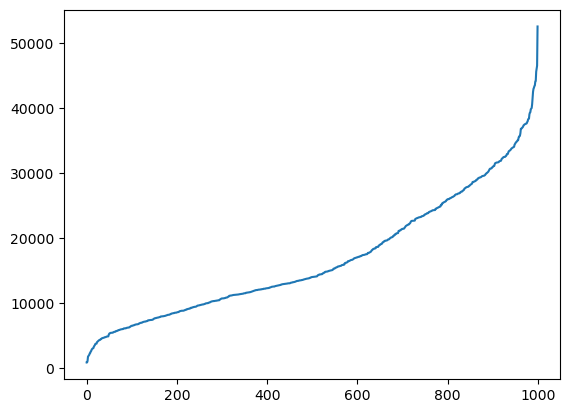

In [28]:
import geopy.distance
import matplotlib.pyplot as plt
def plot_distances_rate(preds, targets):
    dists = [geopy.distance.geodesic(pred, target).m for pred, target in zip(preds, targets)]
    dists.sort()
    plt.plot(range(len(preds)), dists)
    plt.show()
result = predict_next_crimes(200000, 1000, get_samples_by_index)
plot_distances_rate(result['predicted_crime'], result['true crime'])

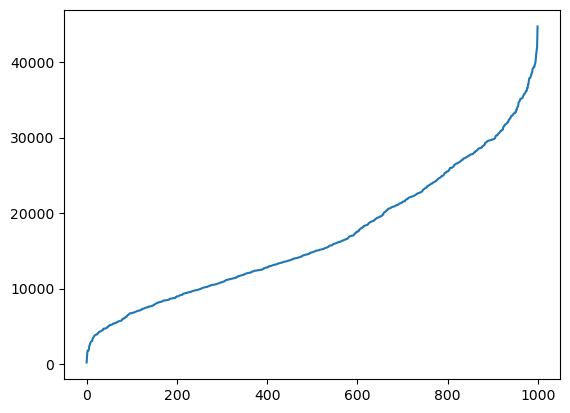

In [29]:
result_test = predict_next_crimes(210000, 1000, get_samples_by_index)
plot_distances_rate(result_test['predicted_crime'], result_test['true crime'])

In [30]:
res = predict_next_crime(4)
res

{'predicted_crime': (34.055729747871375, -118.31163857451611),
 'true crime': (34.0384, -118.2646)}

# A few words about baseline
We want to forecast crimes. This means that we will need some sequence analysis, and LSTM is great option for baseline, as it works with sequences and can predict whole tensor based on the previous ones.
For baseline [this](https://machinelearningmastery.com/lstm-for-time-series-prediction-in-pytorch/) tutorial was used.

During our research we found [this](https://www.relataly.com/predicting-crimes-in-san-francisco-creatingsf-crime-map-using-xgboost/2960/) article. XGBoost and other classifications techniques aren't very useful in forecasting, but they can be useful for crime classification, as model with one-hot encoded crimes code can be worse than model with time, coordinates and separated classifier. We'll test this during our future work. For now let's just see how XGBoost works on our data.

In [31]:
import xgboost
classifier = False
if classifier:
    data_xgb = past_data.loc[:100000, ['DATE OCC', 'LAT', 'LON', 'Crm Cd']]
    encode = {}
    uniques = data_xgb['Crm Cd'].unique()
    for i in range(len(uniques)):
        encode[uniques[i]] = i
    data_xgb['Crm Cd'] = data_xgb['Crm Cd'].apply(lambda x: encode[x])
    model_linear = xgboost.XGBClassifier()
    X_lin = data_xgb.loc[:, data_xgb.columns[:-1]]
    y_lin = data_xgb['Crm Cd']
    X_lin_train, X_lin_test, y_lin_train, y_lin_test = train_test_split(X_lin, y_lin, test_size=0.2)
    model_linear.fit(X_lin_train, y_lin_train)
    preds = model_linear.predict(X_lin_test)
    from sklearn.metrics import accuracy_score
    print(f'estimators: 100, accuracy={accuracy_score(preds, y_lin_test)}')

Plotting the points on the map:

In [32]:
import plotly.graph_objects as go

mapbox_access_token = "pk.eyJ1IjoiYXJhZ29uZXJ1YSIsImEiOiJjbGpwcTh5cjYwMXN1M3J0ZDA2a2d1N2N4In0.DLk40rhIbaRS-bKPbclE4g"

latitude_arr_pred = list()  # lattitude of the predicted coordinates
longitude_arr_pred = list()  # longitude of the predicted coordinates

latitude_arr_real = list()  # lattitude of the real coordinates
longitude_arr_real = list()  # longitude of the real coordinates

number_of_samples = 1000

for index in range(number_of_samples):
    result = predict_next_crime(index)
    latitude_arr_pred.append(result['predicted_crime'][0])
    longitude_arr_pred.append(result['predicted_crime'][1])
    
    latitude_arr_real.append(result['true crime'][0])
    longitude_arr_real.append(result['true crime'][1])
    
#     latitude_arr_pred.append(str(result["predicted_crime"][0]))
#     longitude_arr_pred.append(str(result["predicted_crime"][1]))
    
#     latitude_arr_real.append(str(result["true crime"][0]))
#     longitude_arr_real.append(str(result["true crime"][1]))
    

temp_description = [i for i in range (len(latitude_arr_pred))]  # will be changed later, description of the crime

def map_plotting(latitude_arr, longitude_arr, descriptions):
    latitude_arr = list(map(lambda x: str(x), latitude_arr))
    longitude_arr = list(map(lambda x: str(x), longitude_arr))
    figure = go.Figure(go.Scattermapbox(
        lat=latitude_arr,
        lon=longitude_arr,
        mode="markers",
        marker=go.scattermapbox.Marker(
            size=5,
        ),
        text=descriptions,
    ))
    show_figure(figure)


def show_figure(figure):
    figure.update_layout(
        hovermode="closest",
        mapbox=dict(
            accesstoken=mapbox_access_token,
            bearing=0,
            center=go.layout.mapbox.Center(
                lat=34.0331322,
                lon=-118.301876
            ),
            pitch=0,
            zoom=5
        )
    )
    figure.show()


In [33]:
map_plotting(latitude_arr_pred, longitude_arr_pred, temp_description)  # plotting predicted data

In [34]:
map_plotting(latitude_arr_real, longitude_arr_real, temp_description)  # plotting real data 

In [35]:
num_epoch = 60
lr = 1e-4
def get_GRU(X_train, y_train, X_test, y_test, num_epoch, lr):
    class GRUModel(nn.Module):
        def __init__(self):
            super(GRUModel, self).__init__()
            self.gru = nn.GRU(input_size=X_train.shape[2], hidden_size=len_of_sequence, batch_first=True)
            self.fc = nn.Linear(len_of_sequence, X_train.shape[2])

        def forward(self, x):
            out, _ = self.gru(x)
            out = self.fc(out[:, -1, :])
            return out
    global model
    model = GRUModel().double()
    model.to(device)
    # criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_train, y_train), shuffle=True, batch_size=len_of_sequence)
    loss_fn = nn.MSELoss()

    for epoch in range(num_epoch):
        model.train()
        for X_batch, y_batch in loader:
            y_pred = model(X_batch)
            #raise Exception(f'Check shapes. {y_pred.shape, y_batch.shape}')
            loss = loss_fn(y_pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # Validation
        if epoch % 10 != 0:
            continue
        model.eval()
        with torch.no_grad():
            y_pred = model(X_train)
            train_rmse = np.sqrt(loss_fn(y_pred, y_train).detach().cpu().numpy())
            y_pred = model(X_test)
            test_rmse = np.sqrt(loss_fn(y_pred, y_test).detach().cpu().numpy())
            result = predict_next_crimes(200000, 1000, get_samples_by_index)
            distance_metric = mean_distance(result['predicted_crime'], result['true crime'])
        print("Epoch %d: train RMSE for GRU %.4f, test RMSE for GRU %.4f, distance %.4f in kms" % (epoch, train_rmse, test_rmse, result))
    return model
#model = get_GRU(X_train, y_train, X_test, y_test, num_epoch)

In [36]:
result = predict_next_crimes(200000, 1000, get_samples_by_index)
result['predicted_crime'].shape == result['true crime'].shape

True

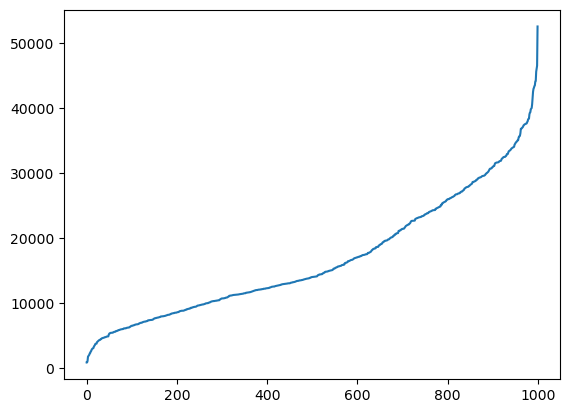

In [37]:
plot_distances_rate(result['predicted_crime'], result['true crime'])

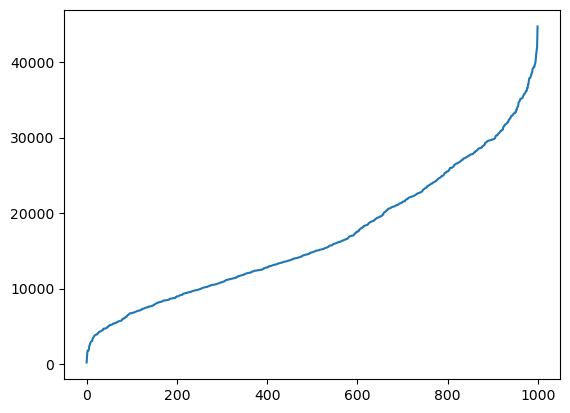

In [38]:
result_test = predict_next_crimes(210000, 1000, get_samples_by_index)
plot_distances_rate(result_test['predicted_crime'], result_test['true crime'])

In [39]:
latitude_strange, longitude_strange = list(map(str, result_test['predicted_crime'][:, 0])), list(map(str, result_test['predicted_crime'][:, 1]))
map_plotting(latitude_strange, longitude_strange, ['' for i in range(len(latitude_strange))])

In [40]:
latitude_normal, longitude_normal = list(map(str, result_test['true crime'][:, 0])), list(map(str, result_test['true crime'][:, 1]))
map_plotting(latitude_normal, longitude_normal, ['' for i in range(len(latitude_strange))])

In [41]:
area_partition = {int(area) - 1: subdata.reset_index(drop=True) for area, subdata in past_data.groupby(by='AREA ')}
area_cnt = len(area_partition.keys())

In [42]:
coeffs_for_areas = []
for i in range(area_cnt):
    data = area_partition[i]
    a_lat_i = data['init_lat'].max() - data['init_lat'].min()
    b_lat_i = data['init_lat'].min()
    data['LAT'] = (data['init_lat'] - b_lat_i) / a_lat_i
    a_lon_i = data['init_lon'].max() - data['init_lon'].min()
    b_lon_i = data['init_lon'].min()
    data['LON'] = (data['init_lon'] - b_lon_i) / a_lon_i
    coeffs_for_areas.append([a_lat_i, b_lat_i, a_lon_i, b_lon_i])
area_partition[0]['LON'].max()

1.0

In [43]:
graph = past_data.groupby(by='DATE OCC').count()['AREA '].values.astype(float)

In [44]:
#graph deformations
new_vars = []
diffs = []
k = 1
graph_log = np.array(graph)
for i in range(4):
    graph_log = np.log(graph_log)
for i in range(len(graph) - 1):
    diffs.append(graph_log[i+1] - graph_log[i])
    for j in range(k):
        val = (graph[i] * (k - j) + graph[i + 1] * j) / k
        new_vars.append(val)

In [45]:
from statsmodels.tsa.stattools import kpss

result_kpss = kpss(diffs, regression = "ct")

print(result_kpss[1], result_kpss[0], result_kpss[3]["1%"], result_kpss[3]["5%"], result_kpss[3]["10%"])

from statsmodels.tsa.stattools import adfuller

result_adf = adfuller(diffs)

print(result_adf[1], result_adf[0], result_adf[4]["1%"], result_adf[4]["5%"], result_adf[4]["10%"])

0.1 0.10441955722121588 0.216 0.146 0.119
0.0 -27.268755083511596 -3.4321572194957715 -2.862338528678273 -2.567195069249532


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [46]:
graph_ser = pd.Series(diffs)
#graph_ser = (2 * graph_ser - graph_ser.min() - graph_ser.max()) / (graph_ser.max() - graph_ser.min())
graph_ser_new = (graph_ser - graph_ser.min()) / (graph_ser.max() - graph_ser.min())
graph_scaled = (graph - graph.min()) / (graph.max() - graph.min())

In [47]:
len(graph_ser_new)
results = []

In [48]:
ys = []
scores = []
def score_model_1d(values, len_of_seq):
    X = []
    y = []
    global len_of_sequence
    len_of_sequence = len_of_seq
    for i in range(len(values) - len_of_sequence):
        X.append(values[i:i + len_of_sequence])
        y.append(values[i + len_of_sequence])
    pivot = len(values) // 2
    X_shaped = np.array(X).reshape((-1, len_of_sequence, 1))
    y_shaped = np.array(y).reshape((-1, 1))
    X_train = torch.tensor(X_shaped[:pivot], device=device)
    X_test = torch.tensor(X_shaped[pivot:], device=device)
    y_train = torch.tensor(y_shaped[:pivot], device=device)
    y_test = torch.tensor(y_shaped[pivot:], device=device)
    y_test_np = y_test.cpu().detach().numpy().reshape((-1))
    num_epoch = 400
    lr= 1e-2
    model_simple = get_LSTM(X_train, y_train, X_test, y_test, num_epoch, lr, False)
    preds = model_simple(X_test[:500]).cpu().detach().numpy().reshape((-1))
    results.append(preds)
    ys.append(y_test_np)
    torch.cuda.empty_cache()
    scores.append(np.linalg.norm(y_test_np[:500] - preds))

In [49]:
for i in range(5, 70, 5):
    score_model_1d(graph_scaled, i)
    score_model_1d(graph_ser_new, i)

In [50]:
print(scores)

[0.8913399323255808, 0.9374058437944212, 0.8136076714087533, 0.9018725440855658, 1.1792417312661128, 0.940494242487102, 0.8318920349110643, 0.9279904145407791, 0.8434493061863552, 0.9055250750180525, 0.6347256771255811, 0.7809118988312971, 0.9207762394752993, 0.8130624777342229, 0.7808121697168514, 0.8224388122560159, 0.8199385304314781, 0.89699743798294, 0.8568931264351518, 0.9550718684937022, 0.9550768307422596, 0.8625900188103209, 1.0141019167415186, 0.9119722687395839, 0.8678653206221301, 0.9027471822479014]


In [51]:
# import warnings
# warnings.filterwarnings("ignore")

def test_stat(values):
    graph_log = np.array(values)
    for i in range(2):
        graph_log = np.log(graph_log)
    for i in range(len(graph) - 1):
        diffs.append(graph_log[i+1] - graph_log[i])
    result_kpss = kpss(diffs, regression = "ct")
    res1 = result_kpss[1] >= 0.05
    res2 = result_kpss[0] < result_kpss[3]["10%"]
    result_adf = adfuller(diffs)
    res3 = result_adf[1] < 0.05
    res4 = abs(result_adf[0]) > abs(result_adf[4]["1%"])
    if res1 and res2 and res3 and res4:
        print('passed!')
        return True
    return False

In [52]:
for i in range(area_cnt):
    data = area_partition[i].groupby(by='DATE OCC').count()['LAT'].values
    if test_stat(data):
        print(i)
    else:
        print(i, 'not passed!')

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




passed!
0


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




passed!
1


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




passed!
2


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




passed!
3


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




passed!
4


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




passed!
5


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




passed!
6


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




passed!
7


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




passed!
8


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




passed!
9


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




passed!
10


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




passed!
11


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




passed!
12


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




passed!
13


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




passed!
14


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




passed!
15


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




passed!
16


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




passed!
17


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




passed!
18


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




passed!
19


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




passed!
20
